In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from mlp import MLPClassifier
from utils import column_transformer, tree_column_transformer, VIF_SELECTED_VARIABES, ModelComparator

In [3]:
X = pd.read_table('x_train.txt', sep=" ", header=None)
X.columns = [str(i) for i in range(X.shape[1])]
y = pd.read_table('y_train.txt', header=None).to_numpy(dtype=np.int8).squeeze()

# Logistic Regression

In [27]:
scaler = column_transformer
X_train_scaled = scaler.fit_transform(np.asarray(X))

In [28]:
Cs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

In [29]:
for C in Cs:
    selector = SelectFromModel(estimator=LogisticRegression(penalty="l1",
                                                            C=C, 
                                                            solver="liblinear", random_state=42),
                                max_features=18)
    selector.fit(X_train_scaled, y)
    selected_features = np.where(selector.get_support())[0]
    print(f"C: {C} | Features: {selected_features}")

C: 0.0001 | Features: []
C: 0.0005 | Features: []
C: 0.001 | Features: []
C: 0.005 | Features: [2 6]
C: 0.01 | Features: [  2   6 209 298]
C: 0.05 | Features: [  2   6  92 127 140 146 163 180 209 217 228 298 332 339 351 421 446 458]
C: 0.1 | Features: [  2   6 228 298 300 318 330 332 336 339 343 344 351 356 366 389 395 458]


## Evaluation

In [30]:
comparator = ModelComparator(X, y, n_splits=5, scaling="standard")

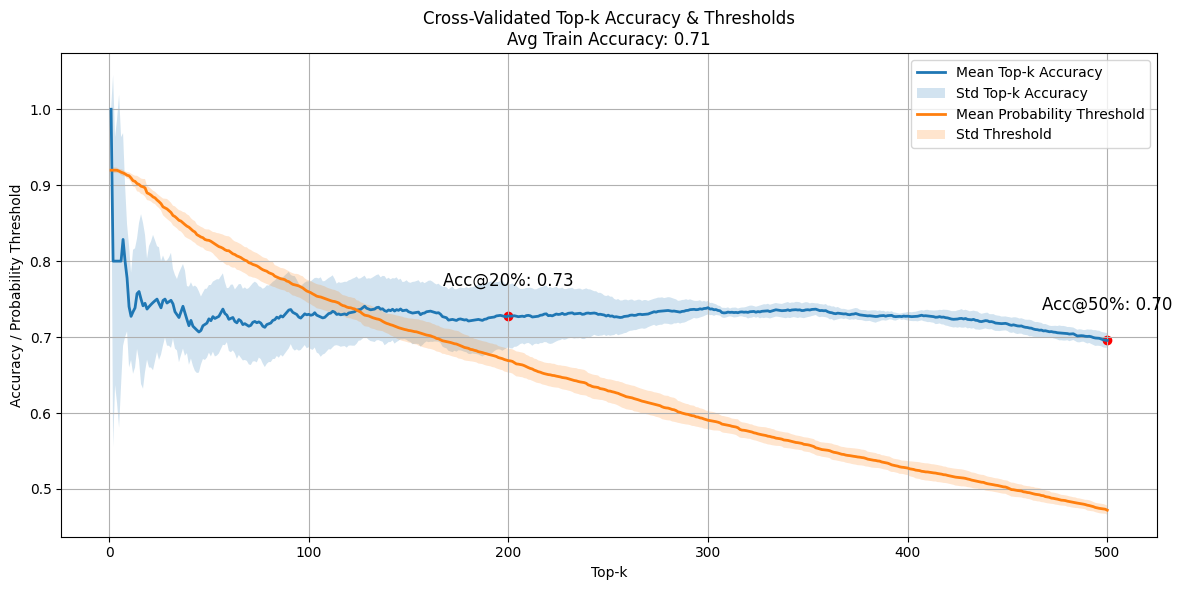

Test Accuracies (Overall): 0.71 ± 0.01


0.727363184079602

In [42]:
comparator.evaluate_model(LogisticRegression(), variables=[2, 6])

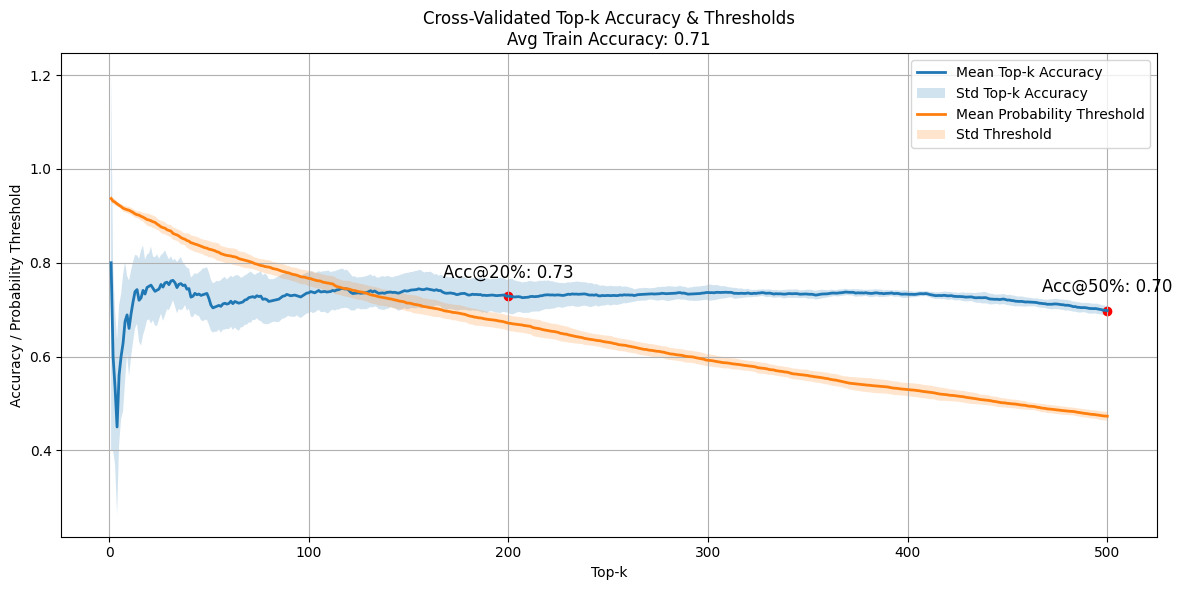

Test Accuracies (Overall): 0.71 ± 0.01


0.7283582089552239

In [ ]:
comparator.evaluate_model(LogisticRegression(), variables=[2,6,209,298])

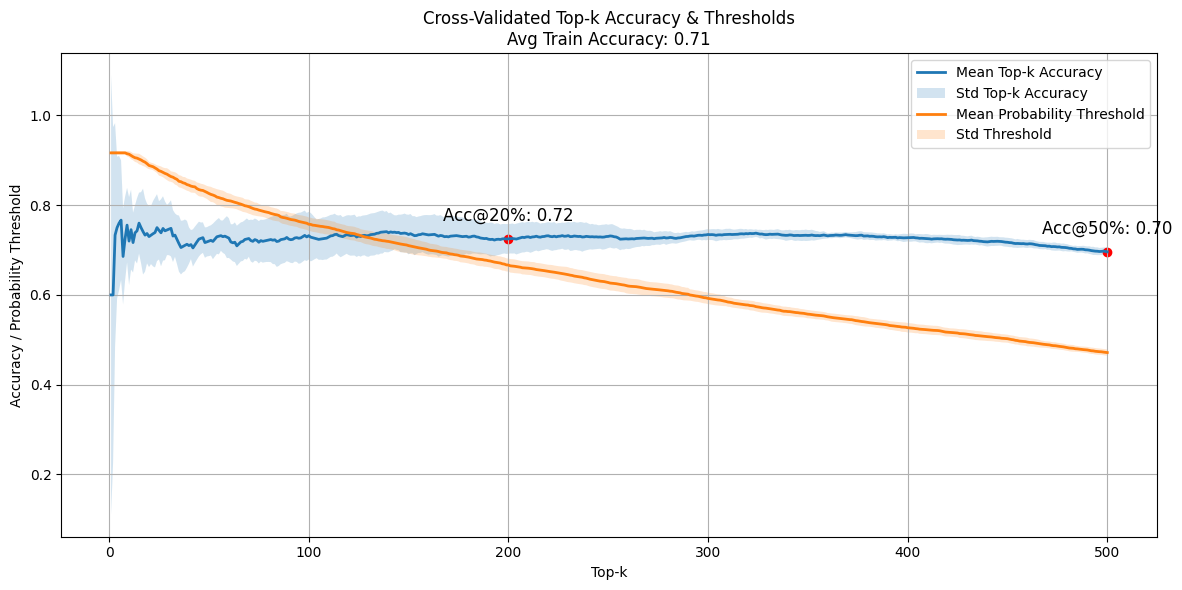

Test Accuracies (Overall): 0.71 ± 0.01


0.7253731343283583

In [ ]:
comparator.evaluate_model(LogisticRegression(), variables=[2])

### Variable set with highest value in terms of cost-score tradeoff is a singleton {2}

# XGBoost

In [5]:
from xgboost import XGBClassifier

In [6]:
scaler = tree_column_transformer
X_train_scaled = scaler.fit_transform(np.asarray(X))

In [15]:
xgbc = XGBClassifier()
xgbc.fit(X_train_scaled, y)
importances_values = np.sort(xgbc.feature_importances_)[::-1]
importances_indices = np.argsort(xgbc.feature_importances_)[::-1]

importance_dict = {i: v for i,v in zip(importances_indices, importances_values)}

In [16]:
importance_dict

{2: 0.02947487,
 414: 0.0047413763,
 156: 0.0046401788,
 262: 0.004503607,
 251: 0.004481632,
 325: 0.004434886,
 480: 0.0042838054,
 152: 0.0041531017,
 400: 0.0040681083,
 353: 0.0038563502,
 437: 0.0038229683,
 139: 0.0037973572,
 154: 0.0037569127,
 447: 0.0037521399,
 17: 0.0036835747,
 462: 0.0036385725,
 0: 0.0036304493,
 344: 0.003606221,
 150: 0.0036020111,
 8: 0.0036017213,
 135: 0.0035953755,
 422: 0.0035372803,
 28: 0.0035328355,
 253: 0.0035111746,
 25: 0.0034836188,
 4: 0.0034531537,
 48: 0.0034108395,
 486: 0.0034064348,
 307: 0.0033732487,
 388: 0.0033708464,
 412: 0.0033687053,
 26: 0.0033496306,
 189: 0.0033421568,
 32: 0.0033328894,
 298: 0.0033281012,
 116: 0.0033197019,
 423: 0.00331646,
 294: 0.003305564,
 149: 0.003305454,
 453: 0.0032949906,
 499: 0.0032789225,
 40: 0.003257177,
 121: 0.003221938,
 368: 0.0032149763,
 78: 0.0032089858,
 144: 0.0032080966,
 209: 0.003194928,
 45: 0.003182144,
 151: 0.0031750598,
 441: 0.0031663028,
 397: 0.0031382246,
 65: 0.0031

## Evaluation

### {2}

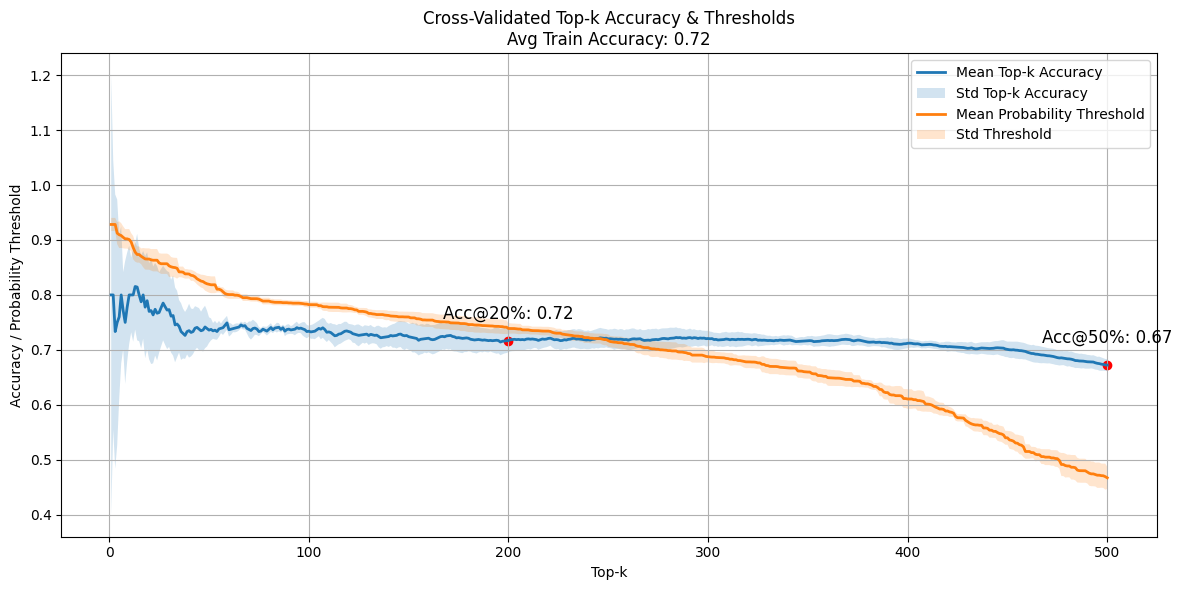

Test Accuracies (Overall): 0.69 ± 0.01


0.718407960199005

In [49]:
comparator.evaluate_model(XGBClassifier(n_estimators=50), variables=[2])

### {2, 414}

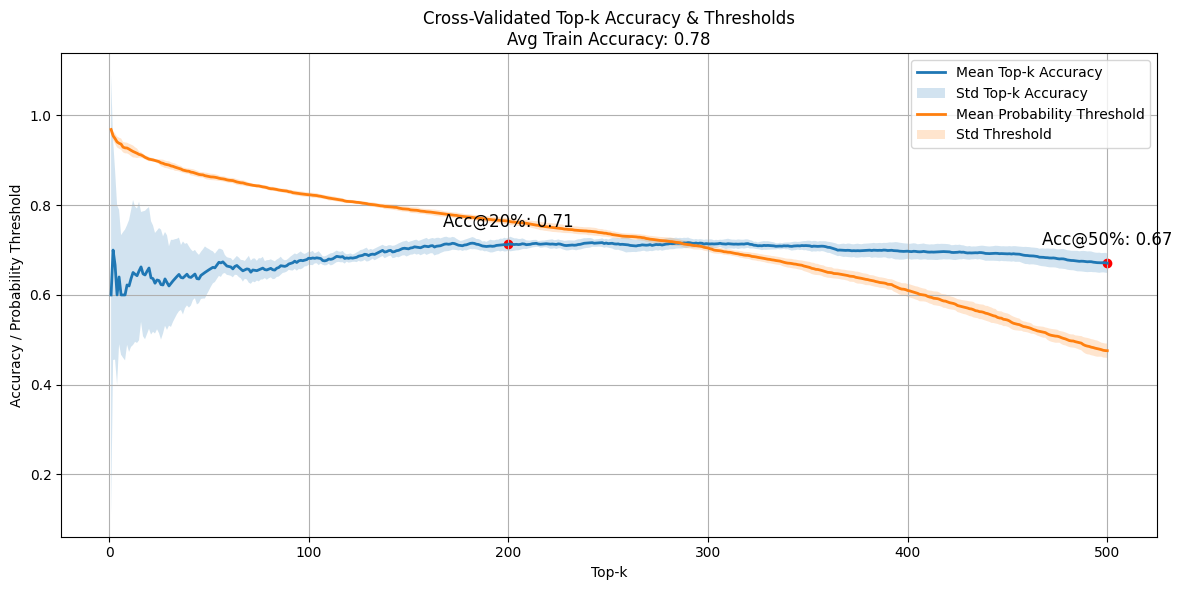

Test Accuracies (Overall): 0.68 ± 0.02


0.7134328358208955

In [48]:
comparator.evaluate_model(XGBClassifier(n_estimators=50), variables=[2, 414])

### {2, 156}

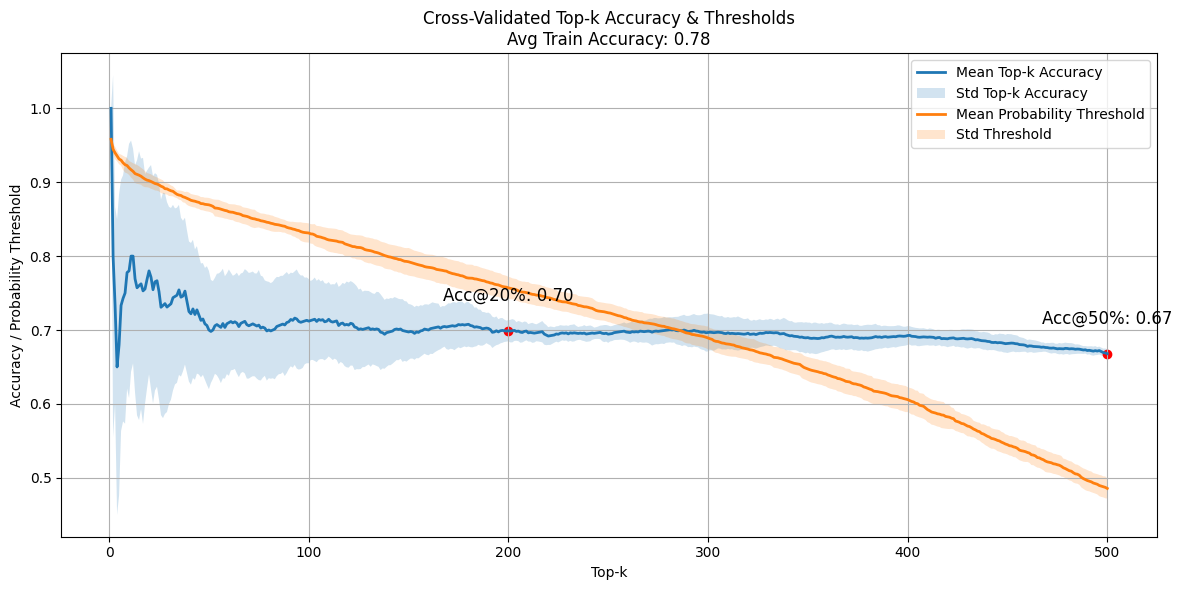

Test Accuracies (Overall): 0.68 ± 0.01


0.6985074626865672

In [47]:
comparator.evaluate_model(XGBClassifier(n_estimators=50), variables=[2, 156])

### {2, 156, 414, 262}

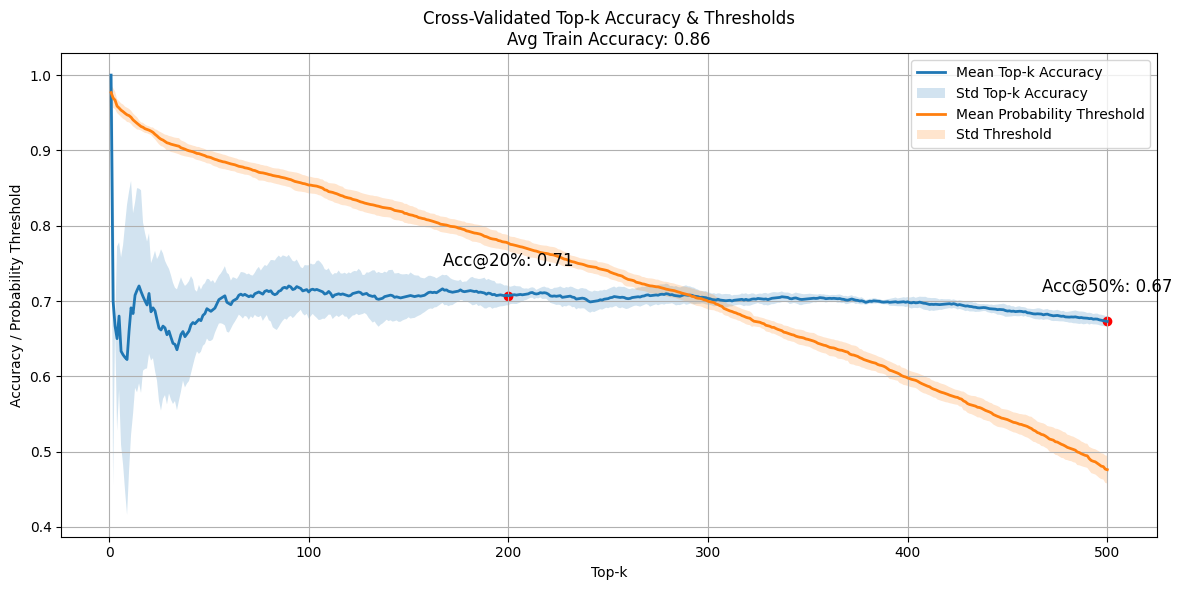

Test Accuracies (Overall): 0.68 ± 0.01


0.707462686567164

In [51]:
comparator.evaluate_model(XGBClassifier(n_estimators=50), variables=[2, 156, 414, 262])

### Variable set with highest value in terms of cost-score tradeoff is a singleton {2}

# MARS
Using the feature importances already mentioned in `feature_selection.ipynb` notebook, section below is just testing their performance

## Evaluation

### All features

In [7]:
comparator = ModelComparator(X, y, n_splits=5, scaling="standard")

In [8]:
all_variables = [2, 8, 462, 4, 351, 254, 28, 485, 55]

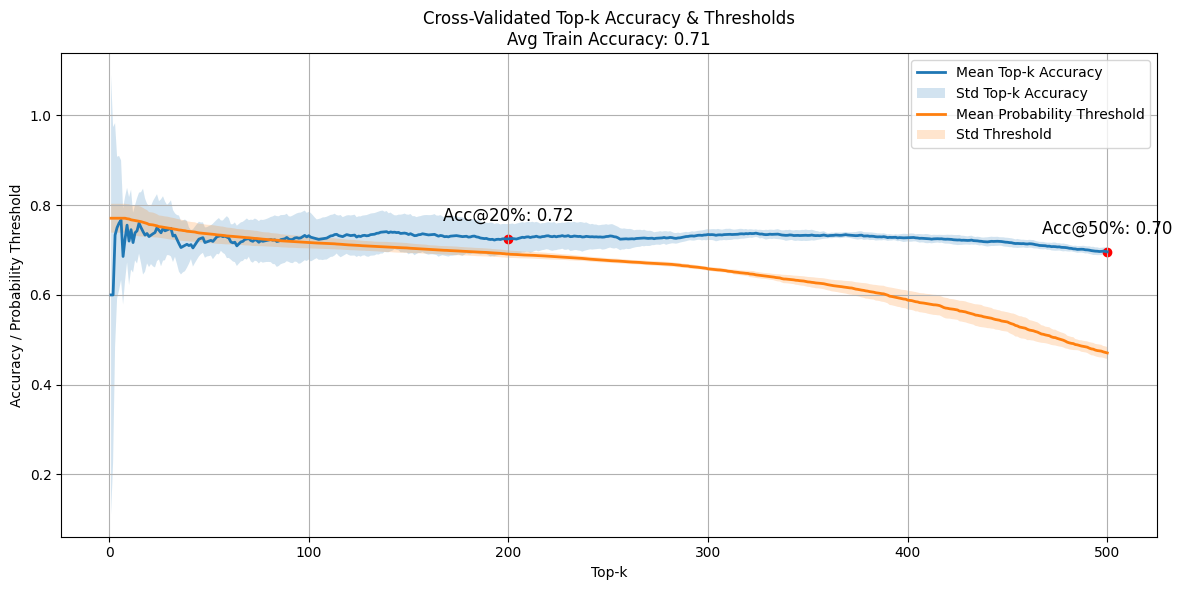

Test Accuracies (Overall): 0.71 ± 0.01


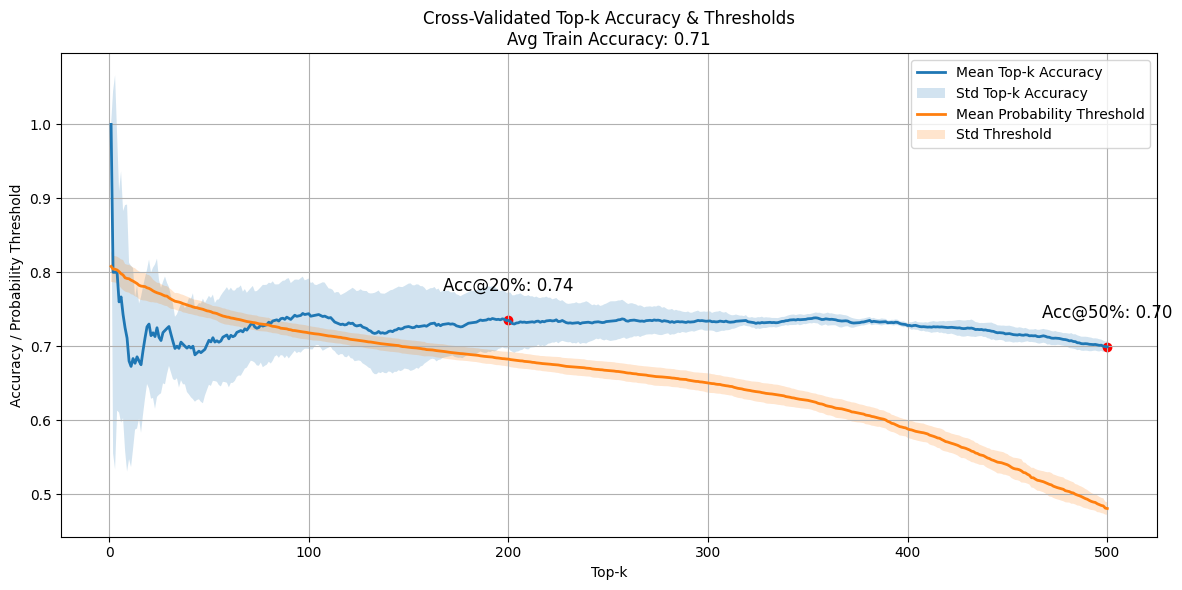

Test Accuracies (Overall): 0.71 ± 0.01


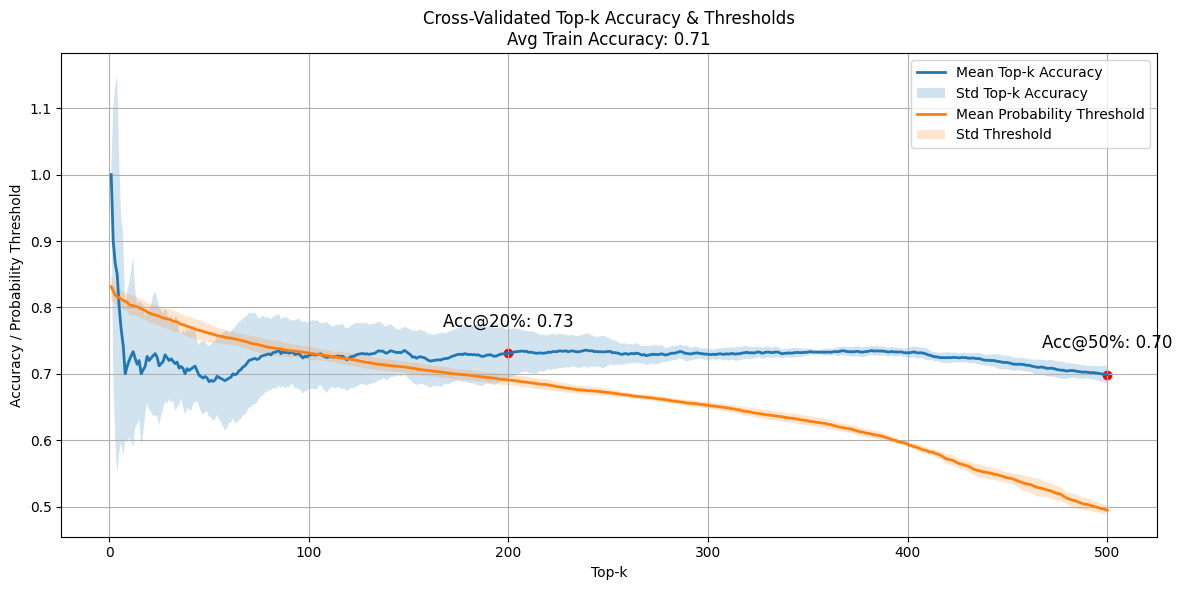

Test Accuracies (Overall): 0.71 ± 0.01


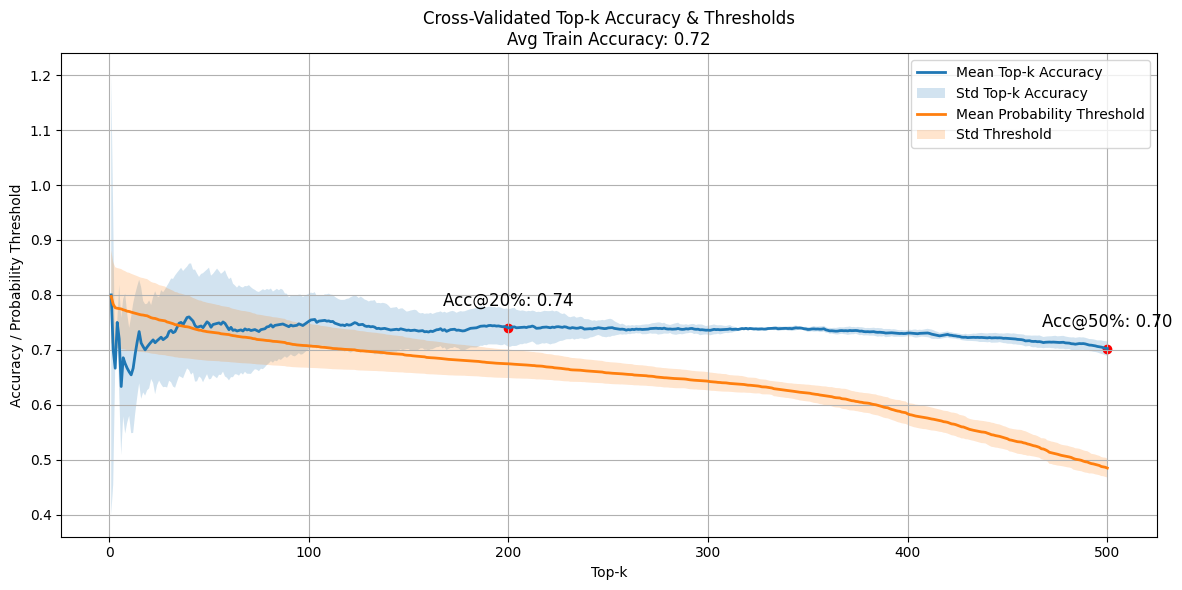

Test Accuracies (Overall): 0.71 ± 0.01


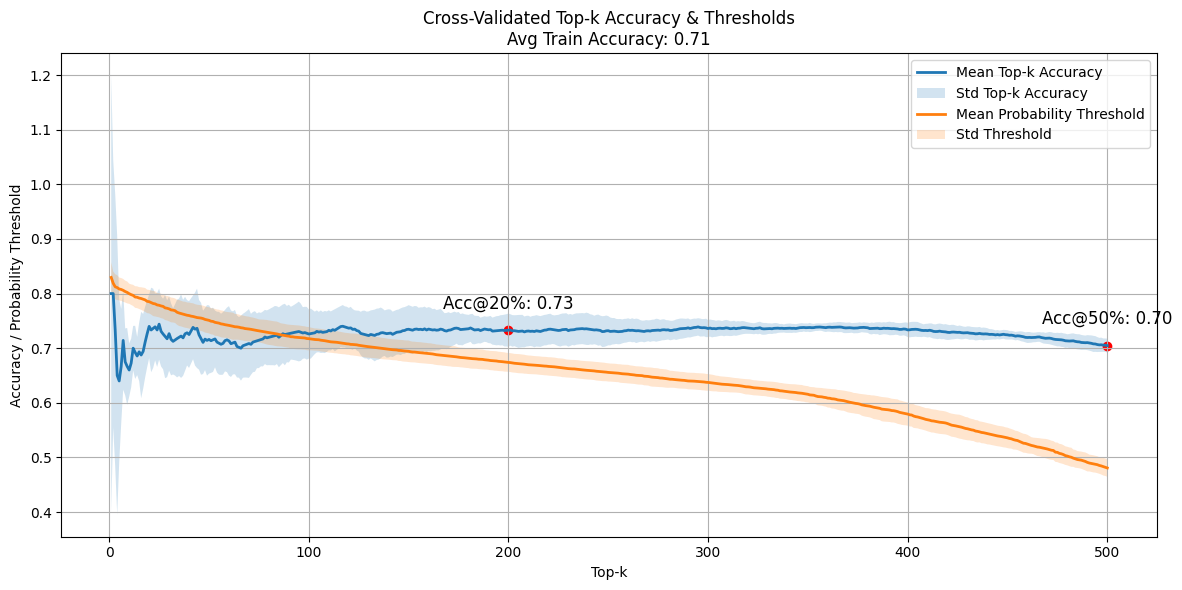

Test Accuracies (Overall): 0.72 ± 0.01


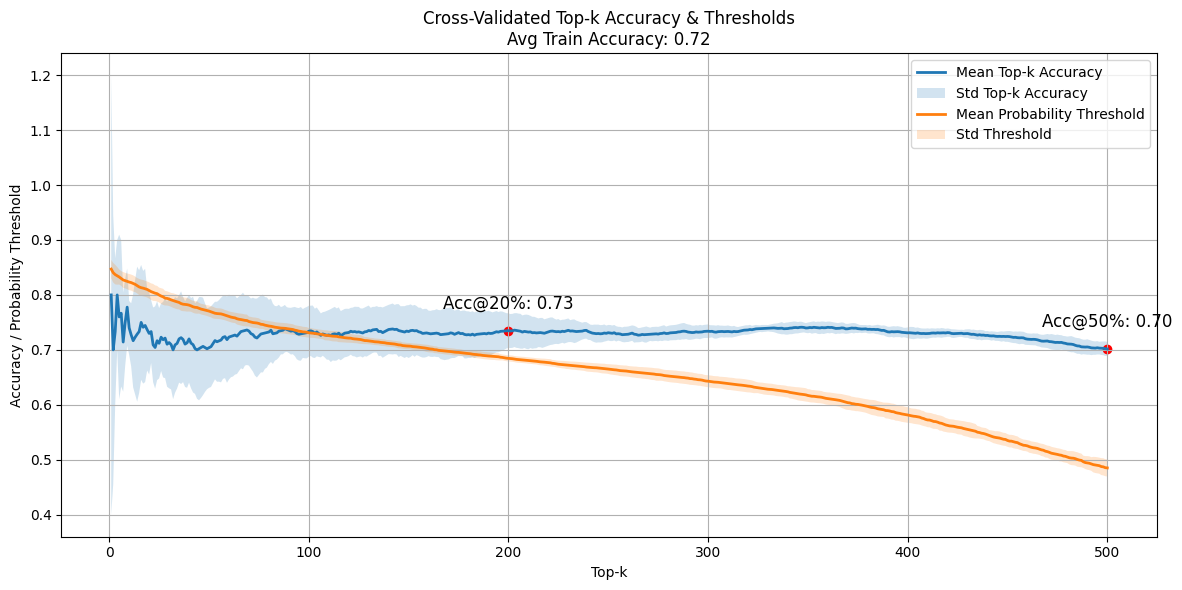

Test Accuracies (Overall): 0.71 ± 0.01


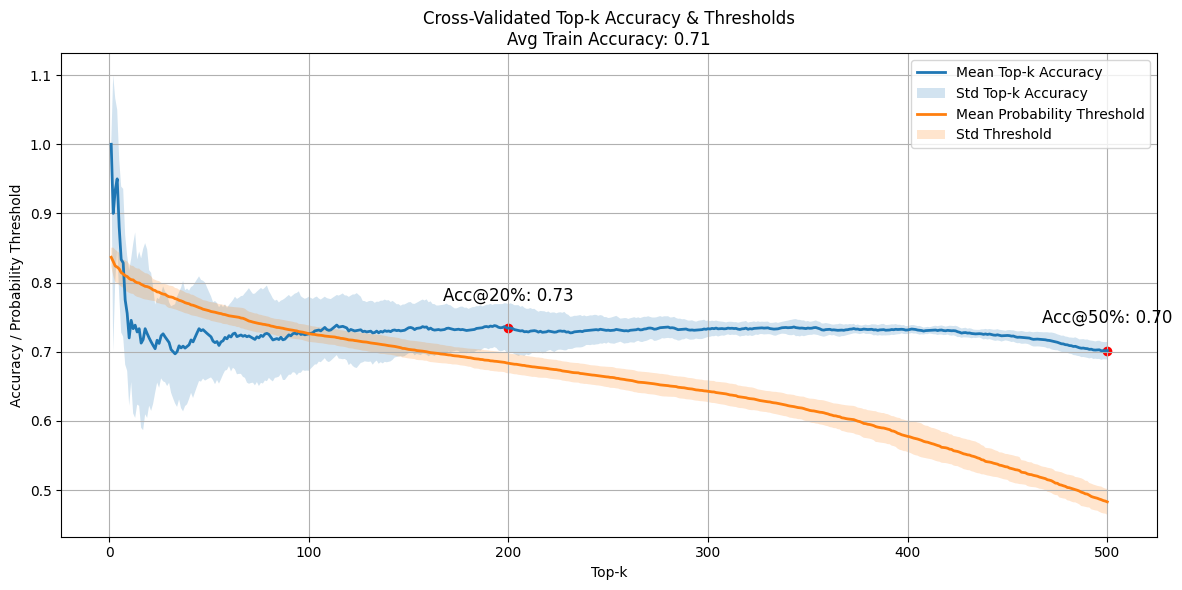

Test Accuracies (Overall): 0.71 ± 0.01


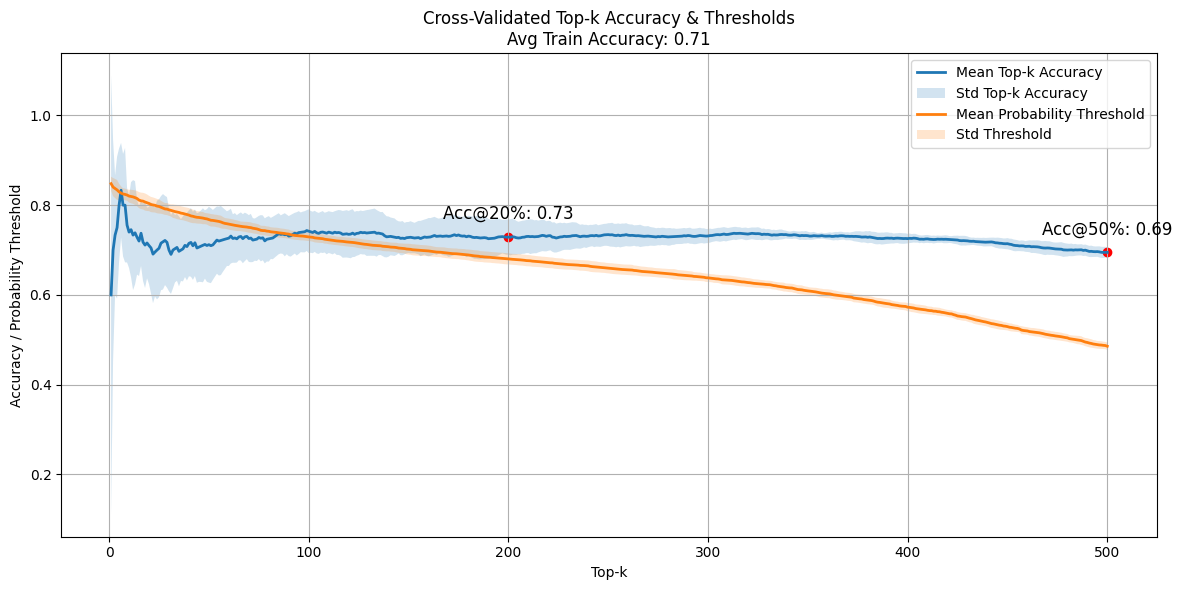

Test Accuracies (Overall): 0.70 ± 0.01


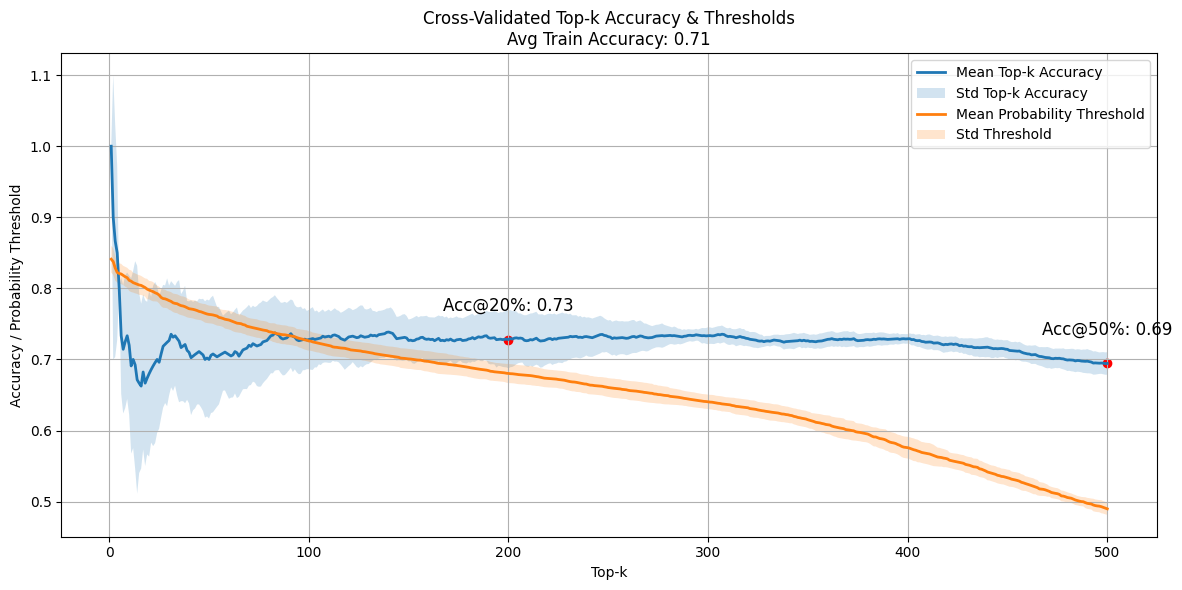

Test Accuracies (Overall): 0.70 ± 0.01


In [9]:
for i in range(1, len(all_variables)+1):
    variables = all_variables[:i]
    model = MLPClassifier()
    comparator.evaluate_model(model, variables)

### VIF-excluded

In [10]:
comparator = ModelComparator(X, y, n_splits=5, scaling="standard")

In [11]:
all_variables = [2, 351, 405, 28, 209, 379, 81, 254, 485, 55]

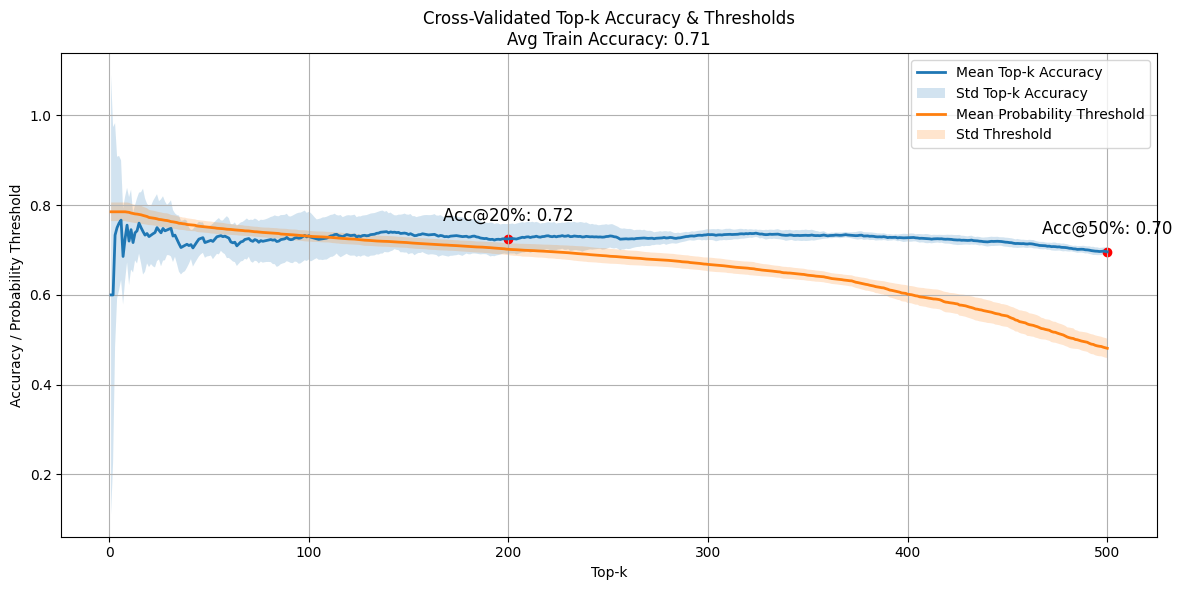

Test Accuracies (Overall): 0.71 ± 0.01


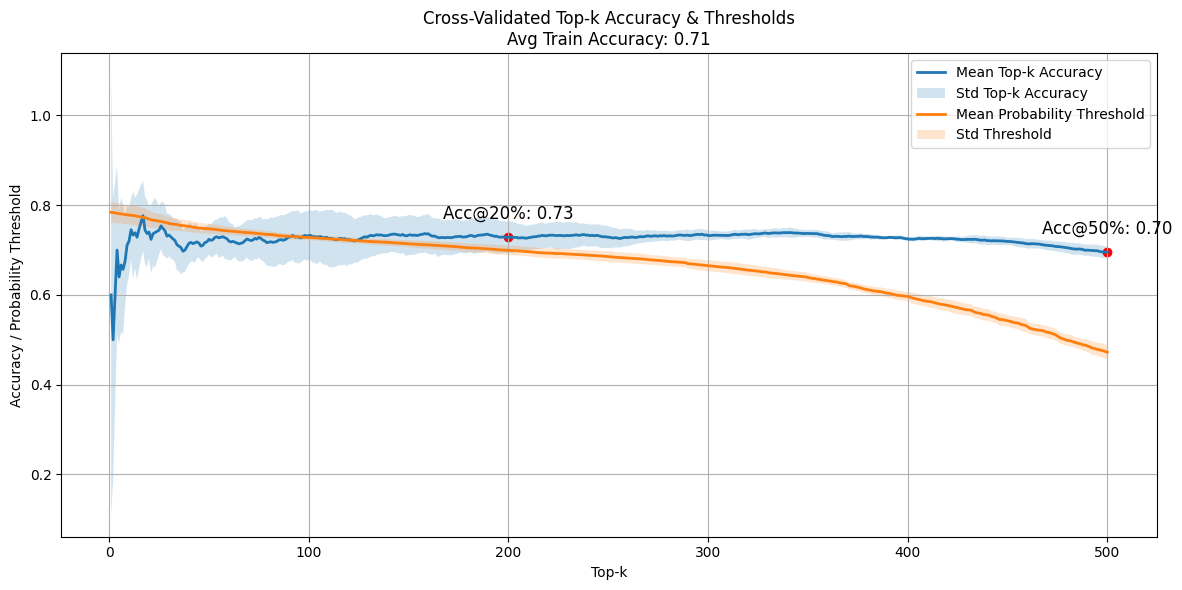

Test Accuracies (Overall): 0.71 ± 0.01


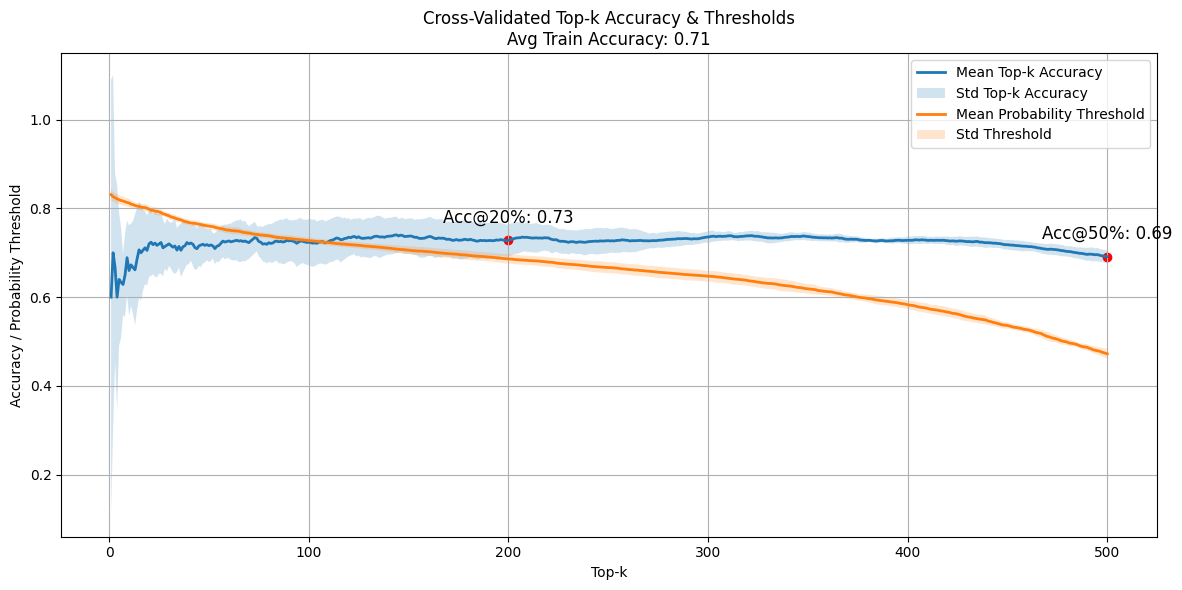

Test Accuracies (Overall): 0.71 ± 0.01


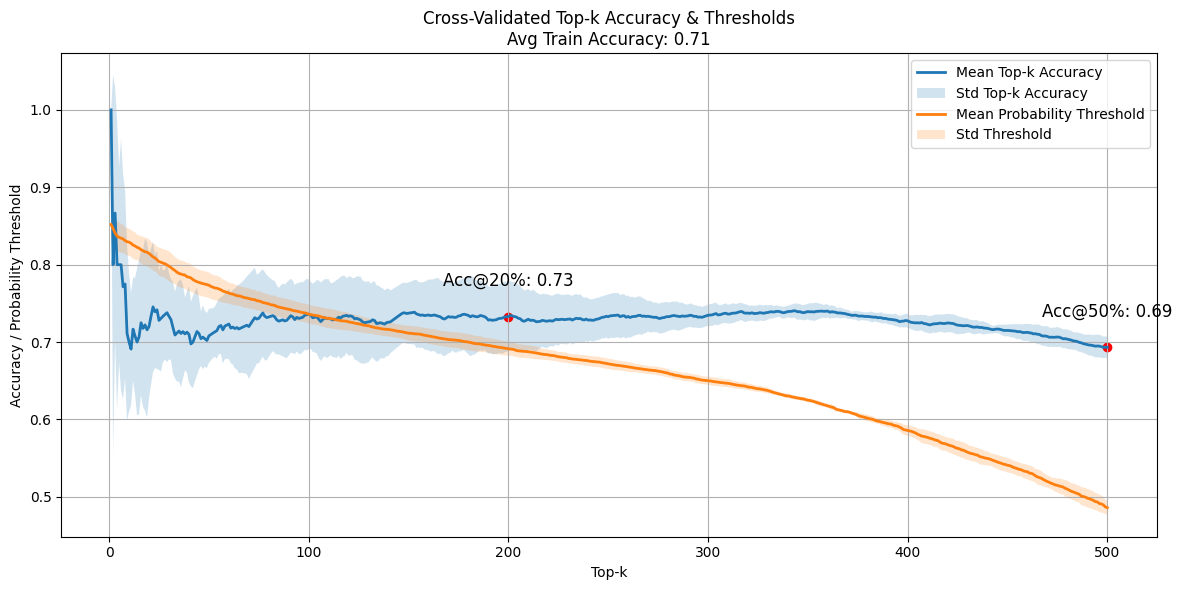

Test Accuracies (Overall): 0.70 ± 0.01


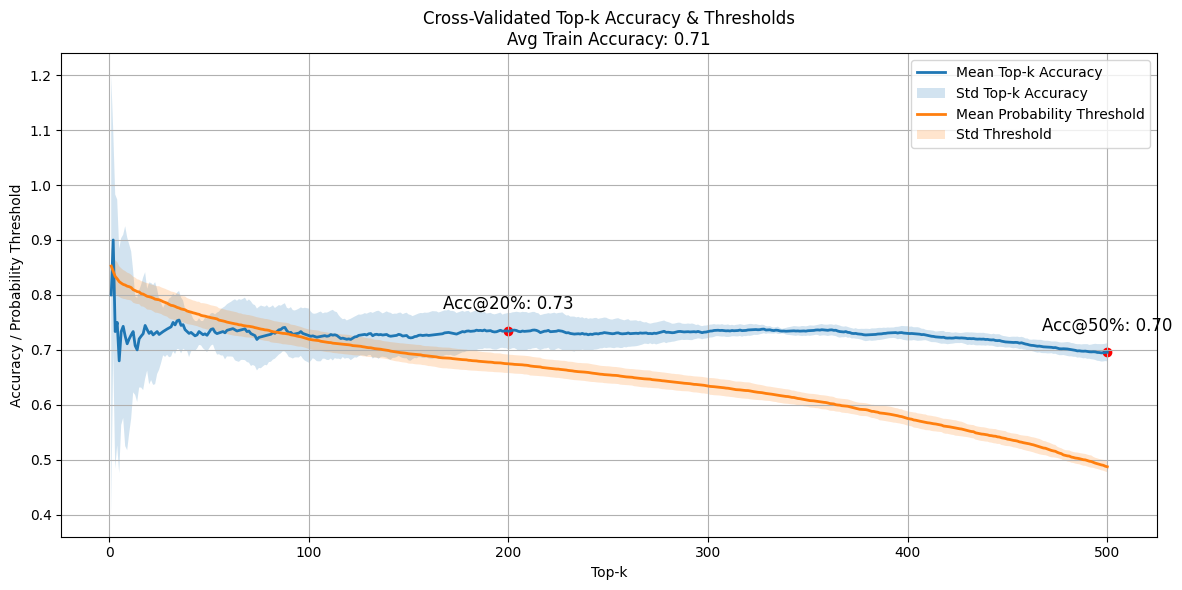

Test Accuracies (Overall): 0.71 ± 0.01


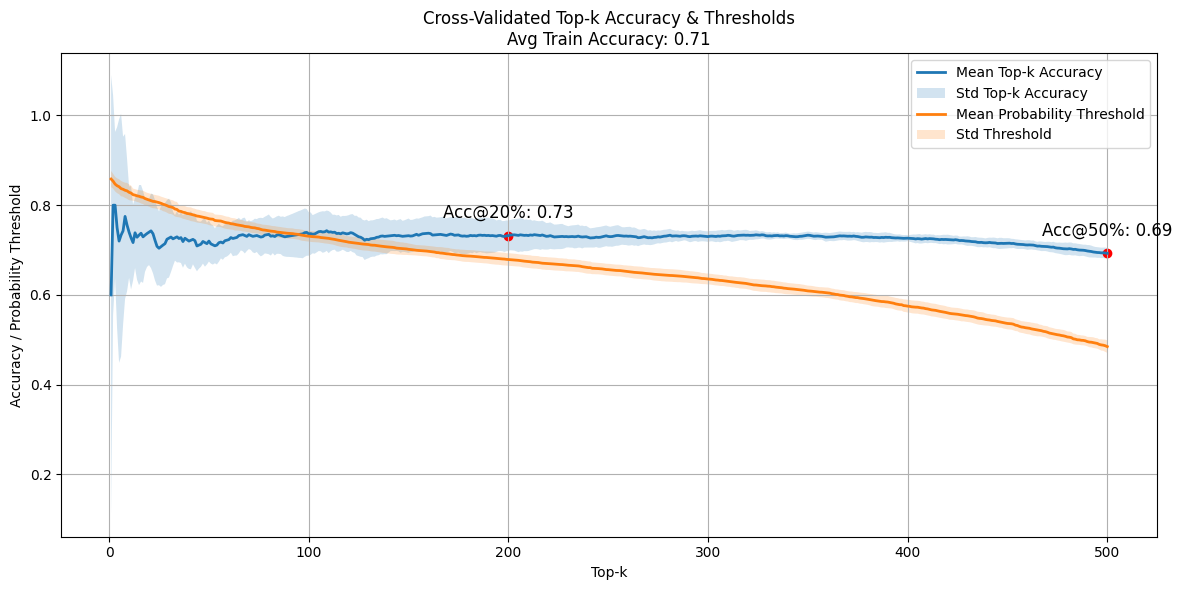

Test Accuracies (Overall): 0.71 ± 0.01


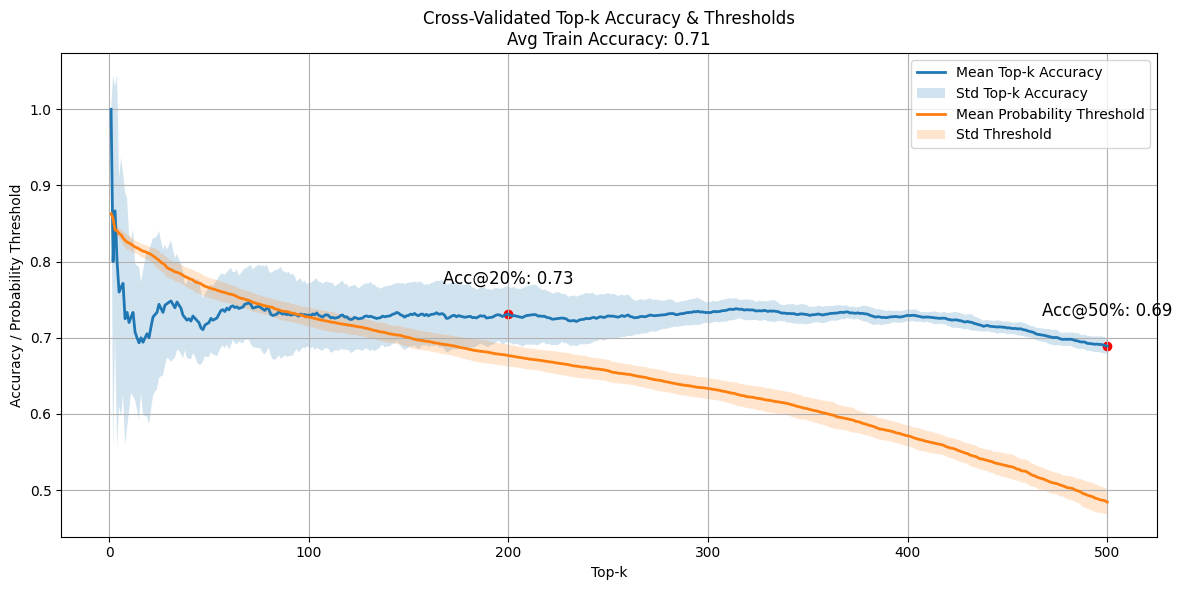

Test Accuracies (Overall): 0.70 ± 0.01


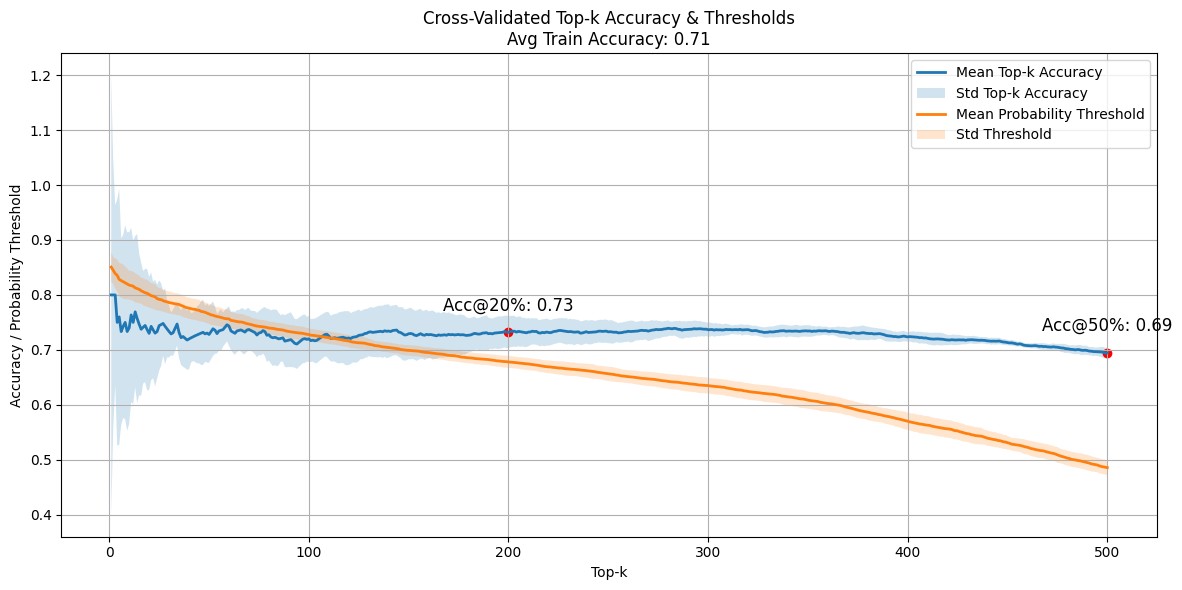

Test Accuracies (Overall): 0.70 ± 0.01


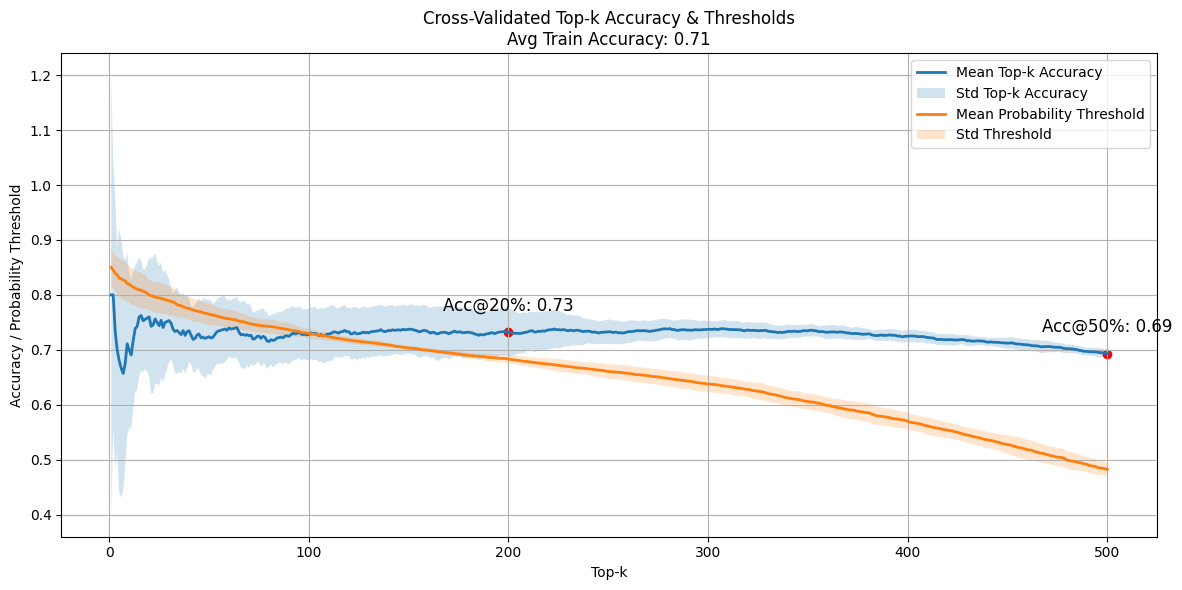

Test Accuracies (Overall): 0.70 ± 0.01


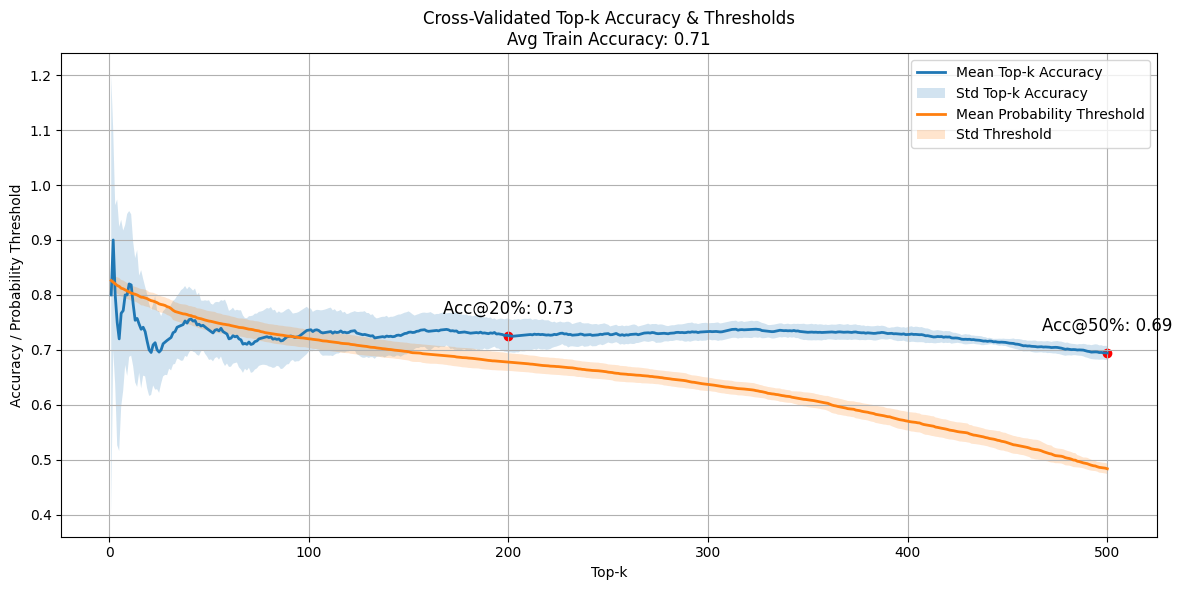

Test Accuracies (Overall): 0.70 ± 0.01


In [12]:
for i in range(1, len(all_variables)+1):
    variables = all_variables[:i]
    model = MLPClassifier()
    comparator.evaluate_model(model, variables)

### VIF-excluded (including {2})

In [13]:
comparator = ModelComparator(X, y, n_splits=5, scaling="standard")

In [14]:
all_variables = [209, 81, 343, 254, 208, 55, 188, 395, 201, 367]

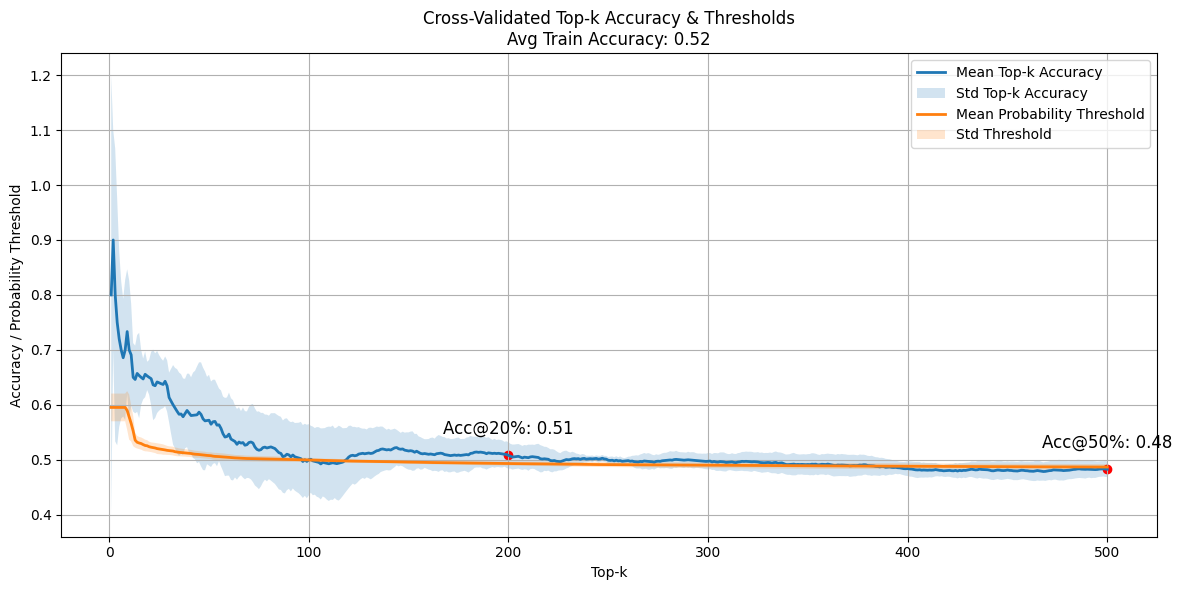

Test Accuracies (Overall): 0.52 ± 0.01


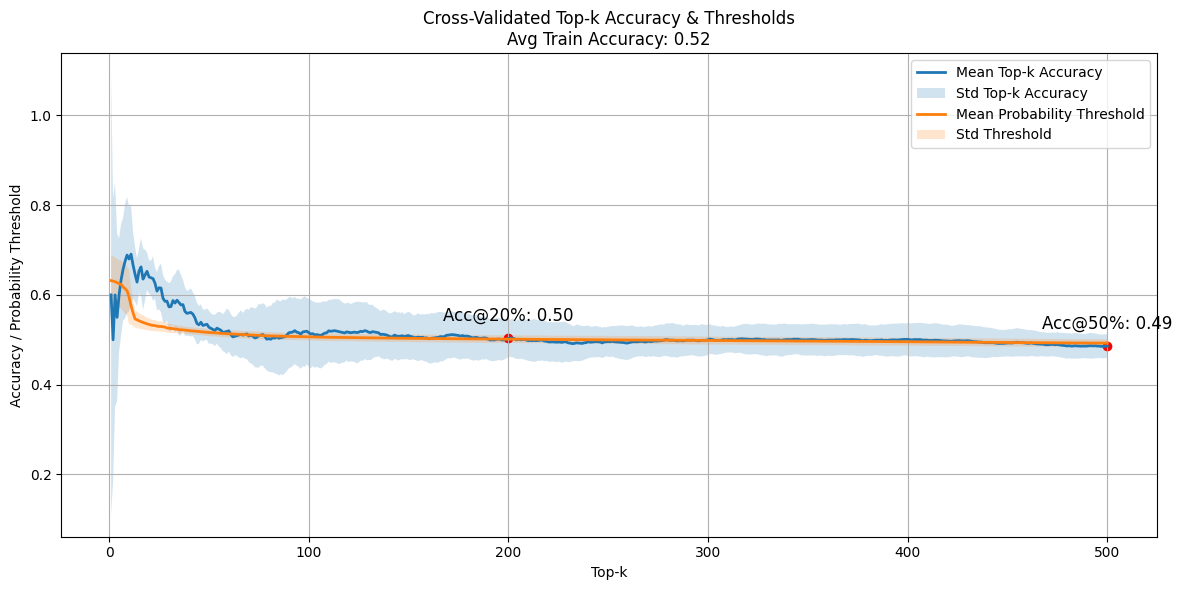

Test Accuracies (Overall): 0.51 ± 0.01


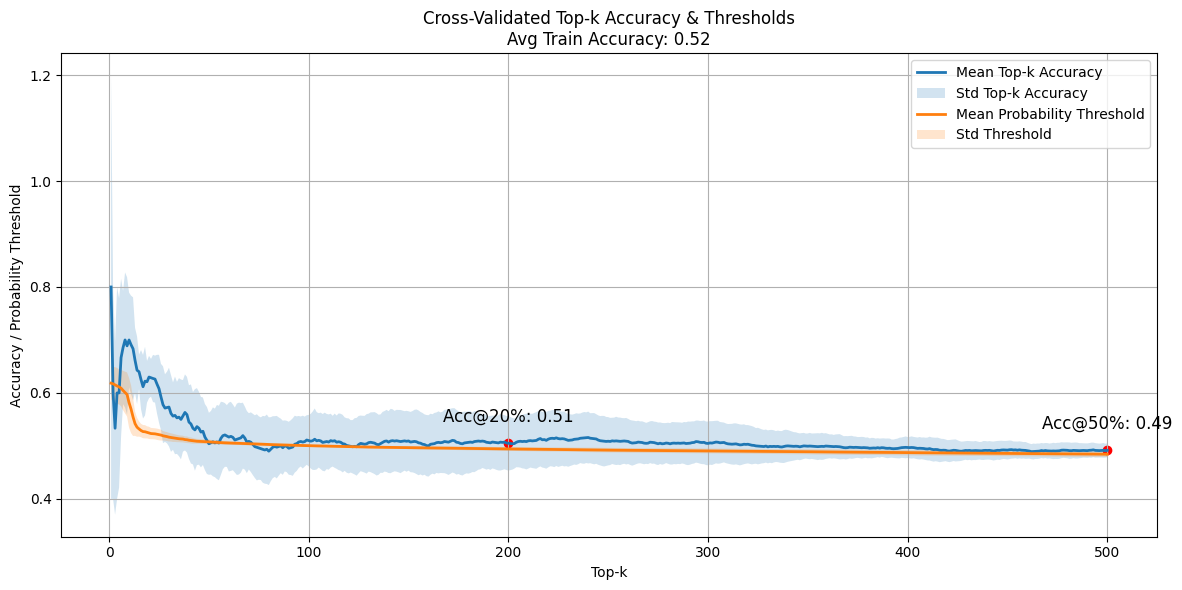

Test Accuracies (Overall): 0.51 ± 0.01


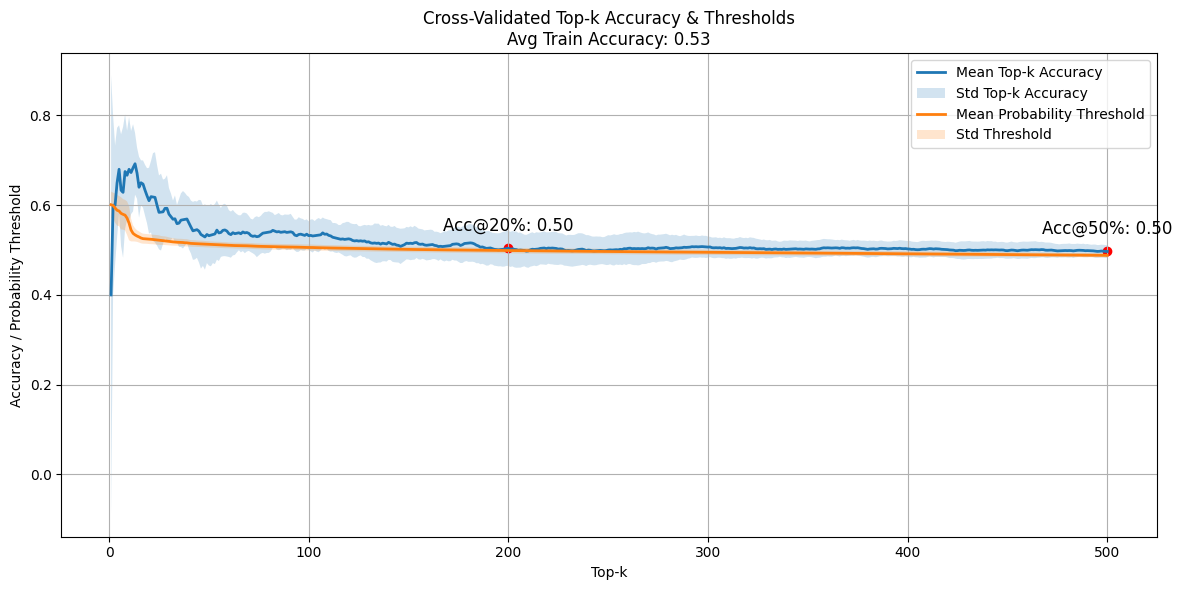

Test Accuracies (Overall): 0.52 ± 0.01


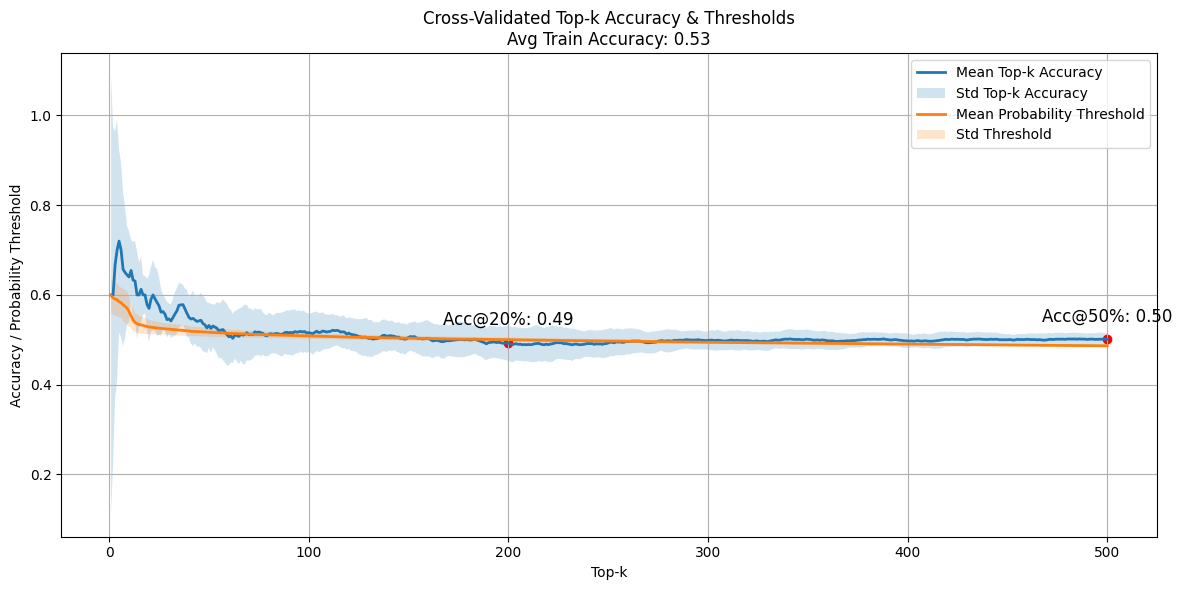

Test Accuracies (Overall): 0.51 ± 0.01


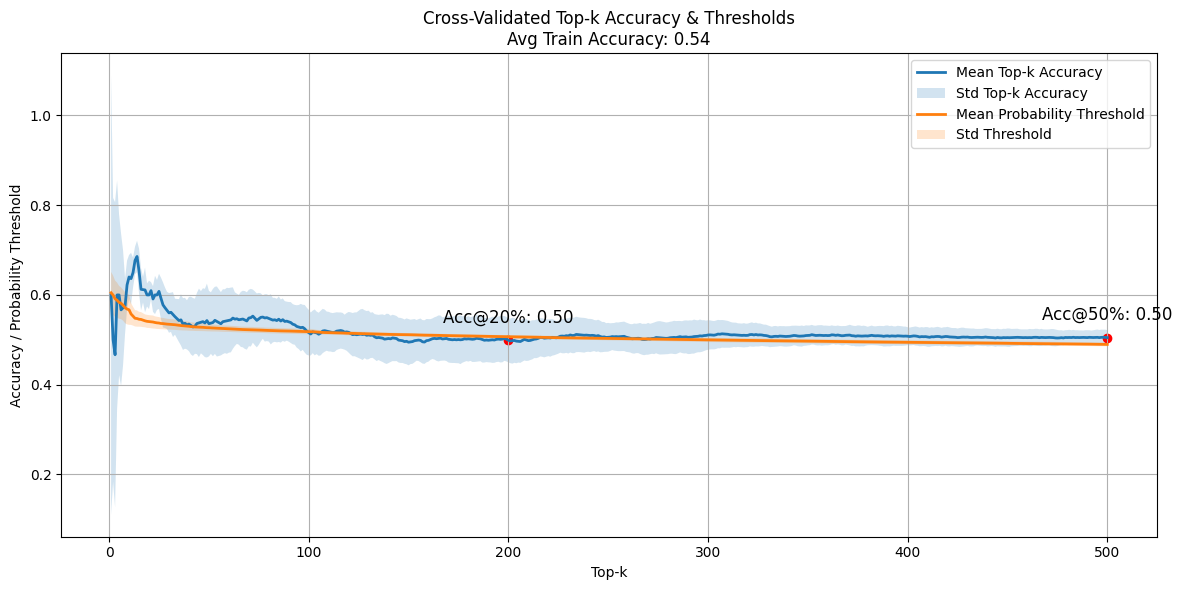

Test Accuracies (Overall): 0.51 ± 0.02


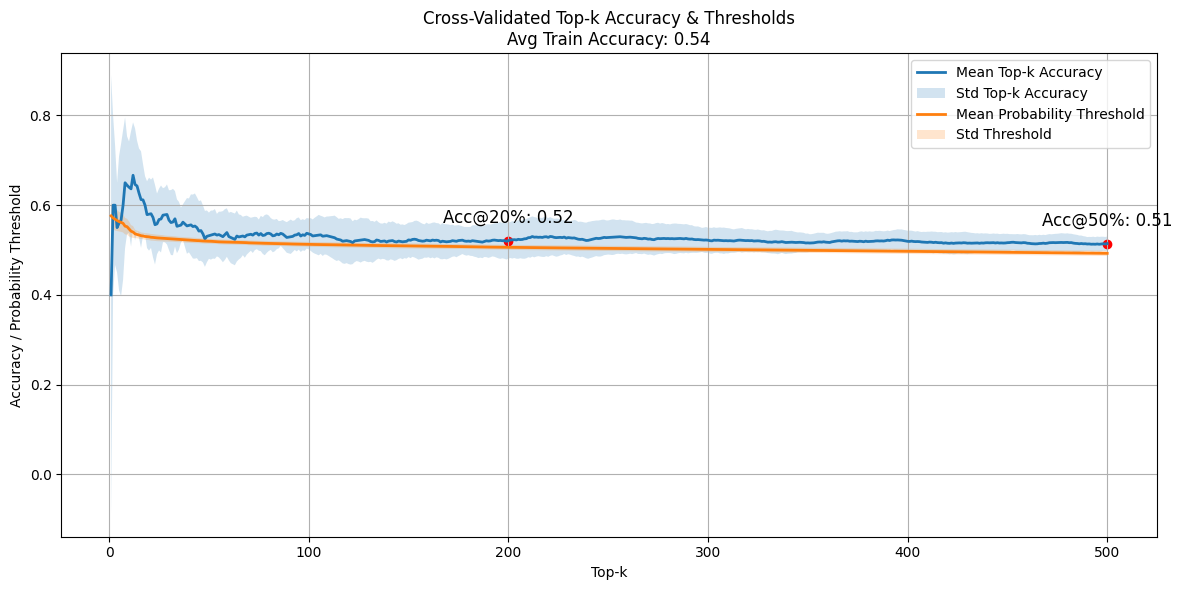

Test Accuracies (Overall): 0.52 ± 0.02


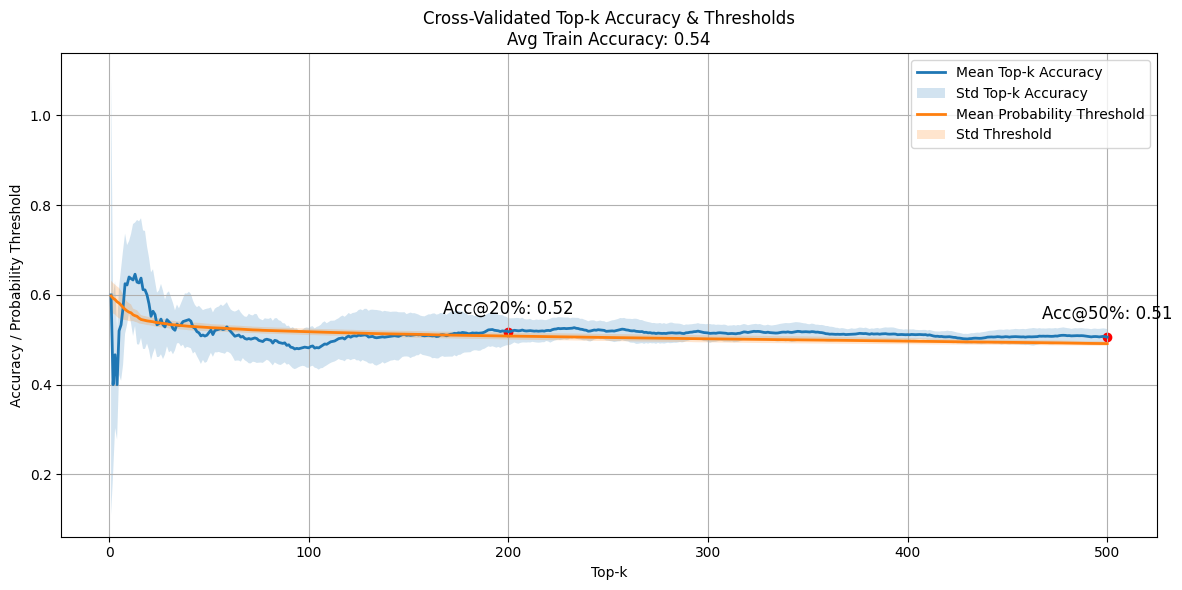

Test Accuracies (Overall): 0.52 ± 0.02


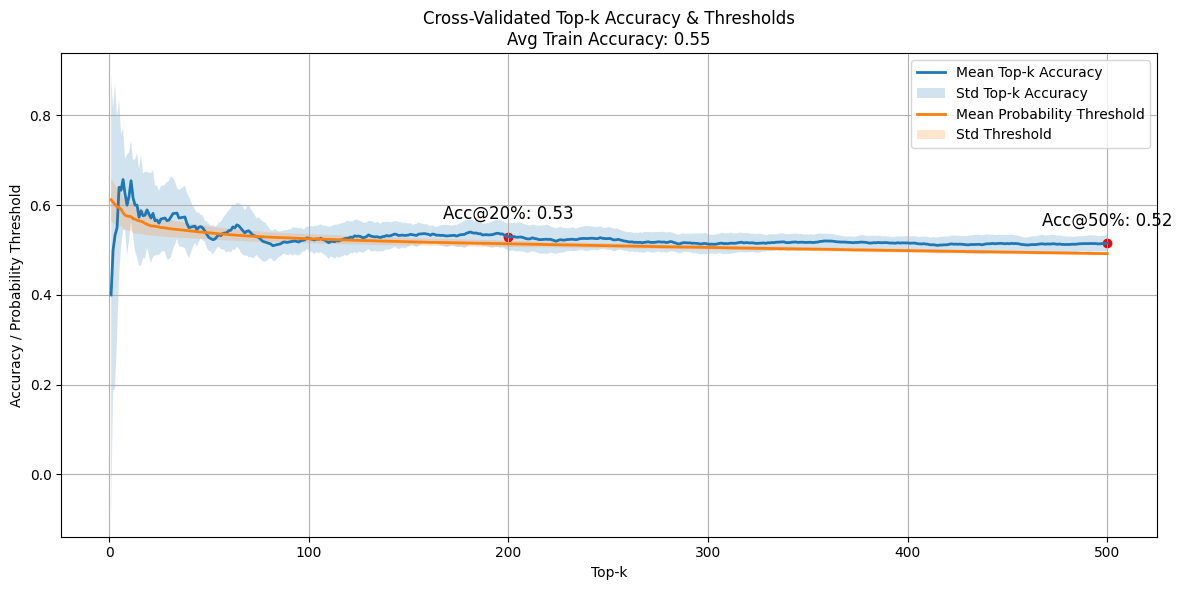

Test Accuracies (Overall): 0.52 ± 0.02


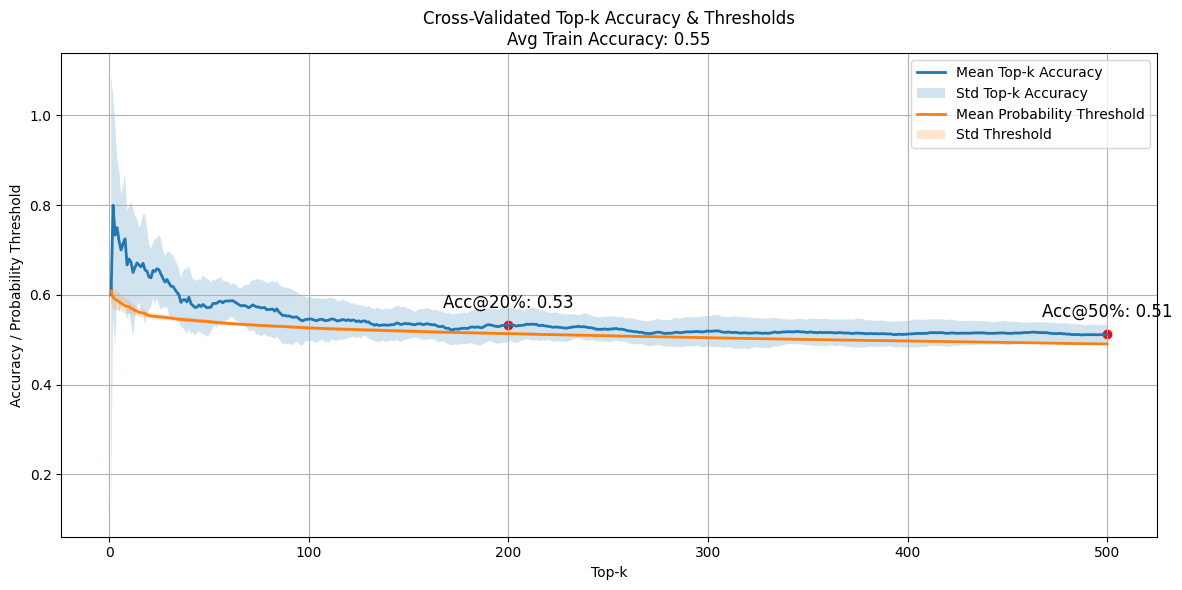

Test Accuracies (Overall): 0.52 ± 0.02


In [15]:
for i in range(1, len(all_variables)+1):
    variables = all_variables[:i]
    model = MLPClassifier()
    comparator.evaluate_model(model, variables)